<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [263]:
import warnings

warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [264]:
dados = pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [265]:
dados.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Verificando o tamanho do dataset

In [266]:
dados.shape

(365, 7)

## Verificando se tem dados nulos

In [267]:
dados.isna().sum()

data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [268]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [269]:
dados.corr().round(3)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000,0.863,0.923,0.024,-0.051,0.575
temp_min,0.863,1.000,0.673,0.099,-0.060,0.393
temp_max,0.923,0.673,1.000,-0.049,-0.040,0.643
chuva,0.024,0.099,-0.049,1.000,0.002,-0.194
fds,-0.051,-0.060,-0.040,0.002,1.000,0.506
consumo,0.575,0.393,0.643,-0.194,0.506,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

In [270]:
sns.set(font_scale = 1.5)
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

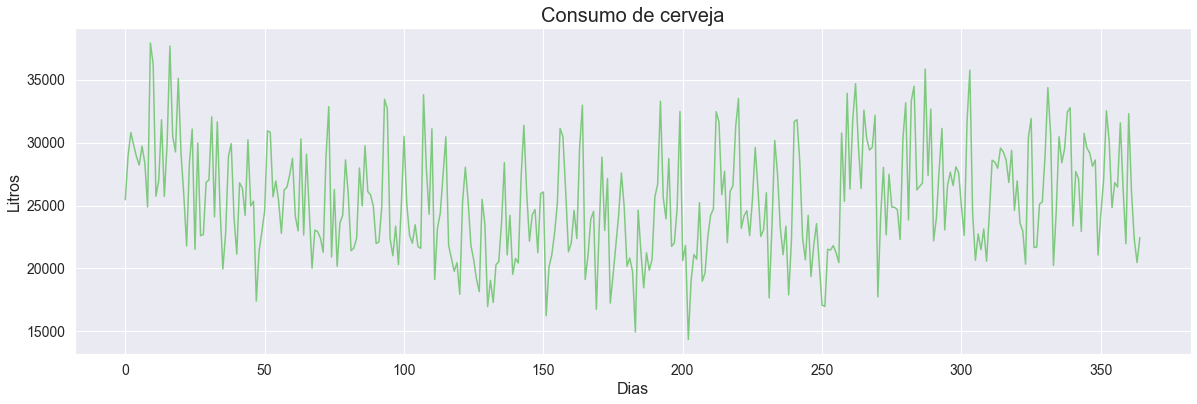

In [271]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [272]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

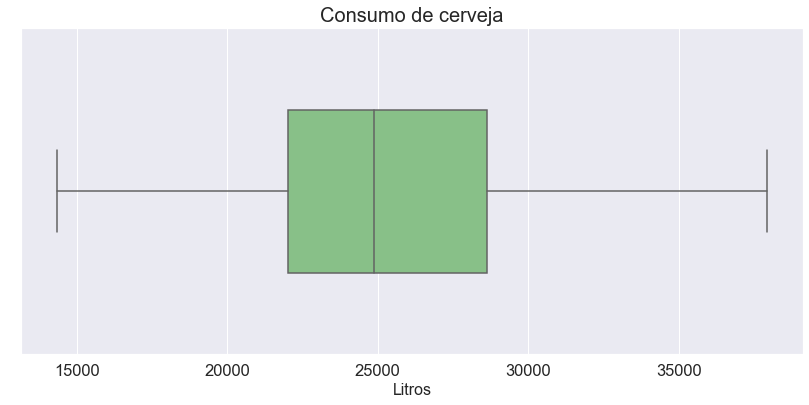

In [273]:
aux = dados.copy()
aux['aux'] = " "

ax = sns.boxplot(data=aux, x='consumo', y='aux', orient='h', width=0.5)

ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('Litros', fontsize=16)
ax.figure.set_size_inches(14, 6)

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

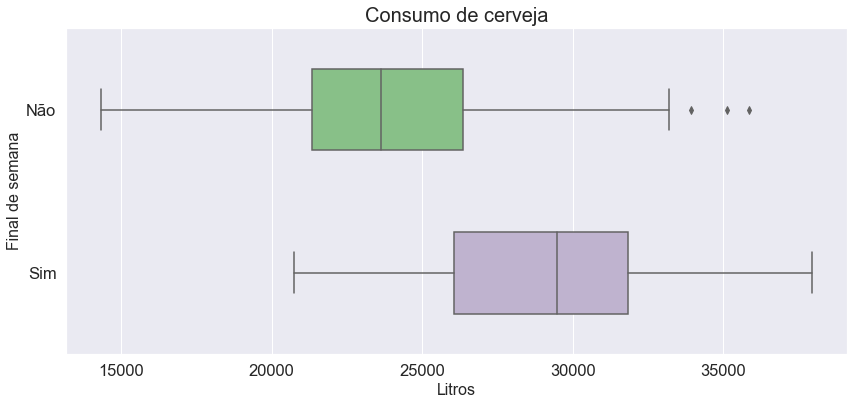

In [274]:
aux = dados.copy()
aux['fds'] = aux['fds'].map({0:'Não', 1:'Sim'})

ax = sns.boxplot(data=aux, x='consumo', y='fds', orient='h', width=0.5)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Final de semana', fontsize=16)
ax.set_xlabel('Litros', fontsize=16)
ax.figure.set_size_inches(14, 6)

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

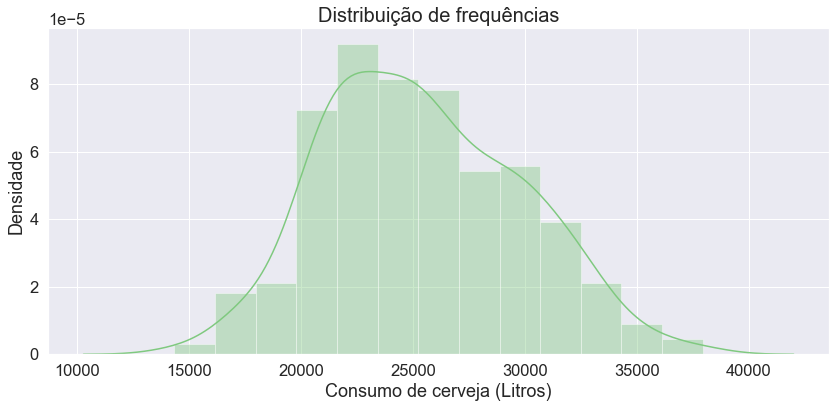

In [275]:
ax = sns.distplot(dados['consumo'])

ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_ylabel('Densidade')
ax.set_xlabel('Consumo de cerveja (Litros)')
ax.figure.set_size_inches(14, 6)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

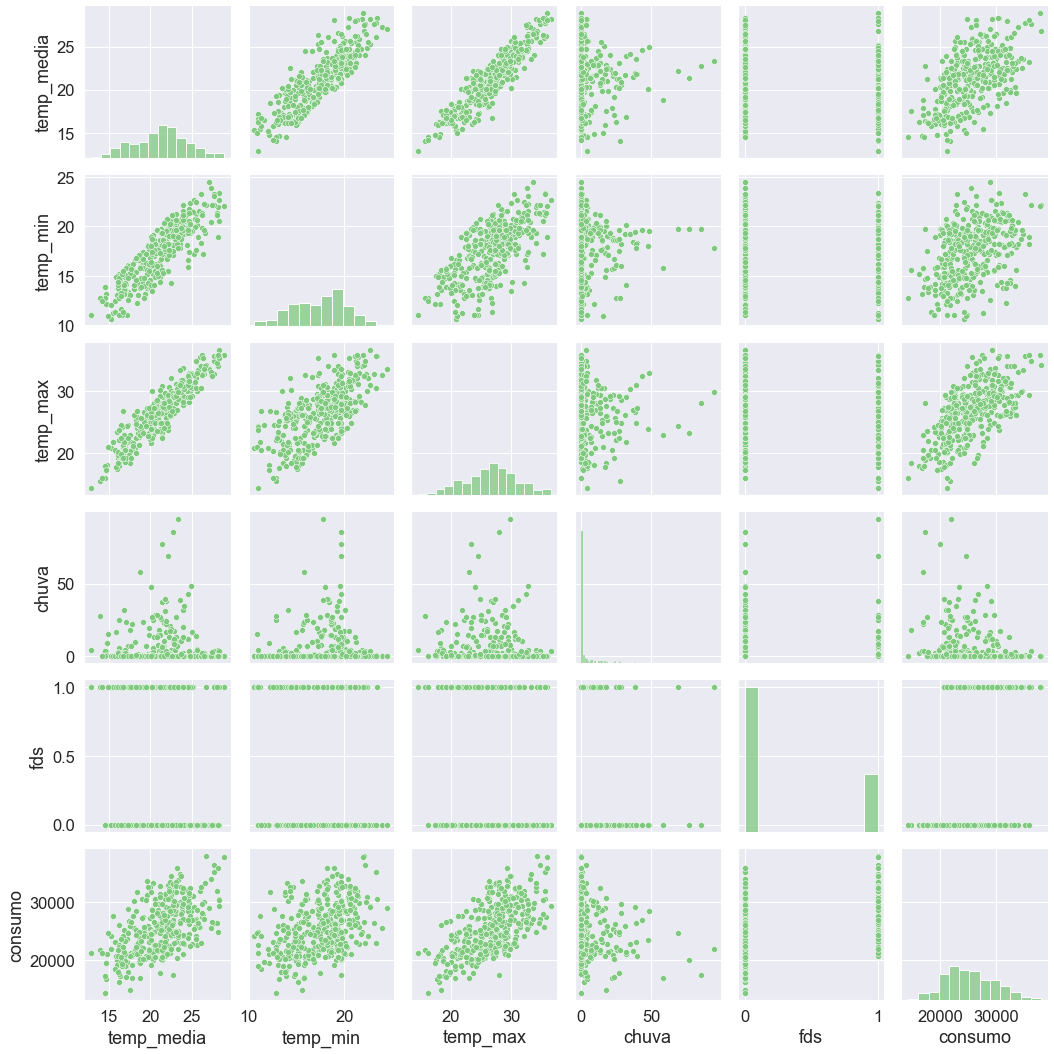

In [276]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

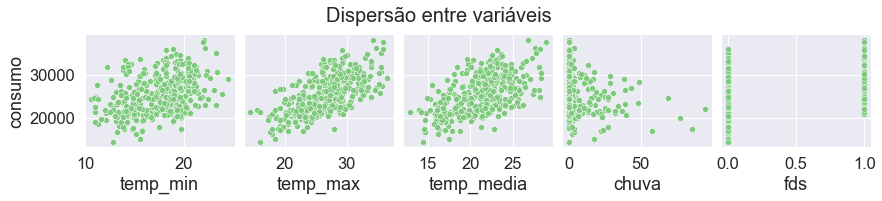

In [277]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_max', 'temp_media', 'chuva', 'fds'])

ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.1)
plt.show()

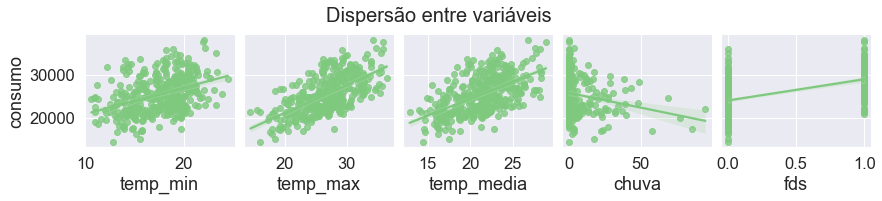

In [334]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_max', 'temp_media', 'chuva', 'fds'], kind='reg')

ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.1)
plt.show()

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

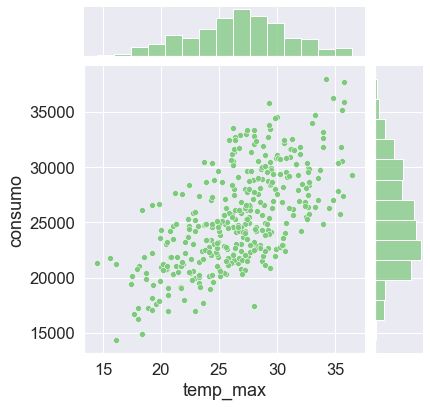

In [279]:
ax = sns.jointplot(data=dados, x='temp_max', y='consumo')

## Plotando um jointplot com a reta de regressão estimada

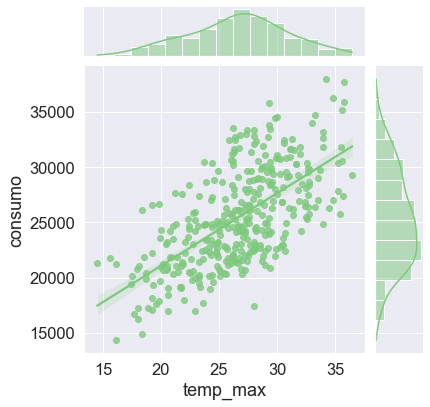

In [280]:
ax = sns.jointplot(data=dados, x='temp_max', y='consumo', kind='reg')

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

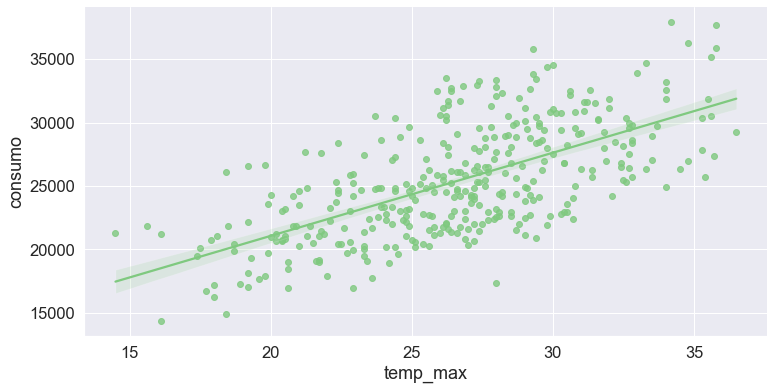

In [281]:
ax = sns.lmplot(data=dados, x='temp_max', y='consumo', line_kws={'color': '#395B50'})
ax.figure.set_size_inches(14, 6)
plt.show()

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

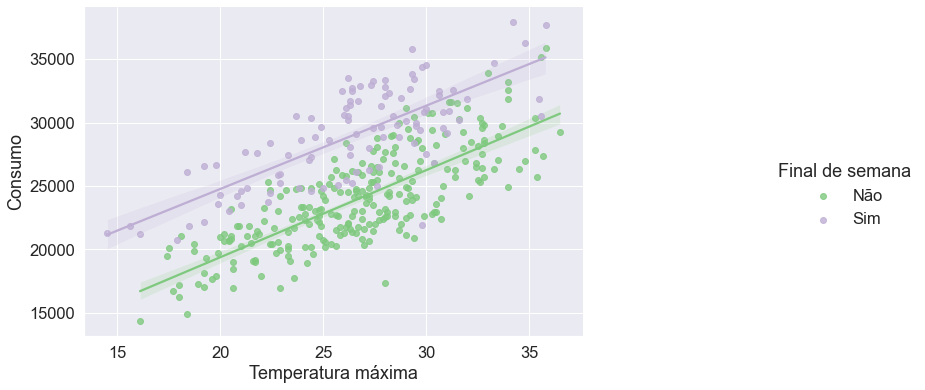

In [282]:
aux = dados.copy()
aux['fds'] = aux['fds'].map({0:'Não', 1:'Sim'})

ax = sns.lmplot(data=aux, x='temp_max', y='consumo', hue='fds', legend=False)

ax.set_xlabels('Temperatura máxima')
ax.set_ylabels('Consumo')
ax.add_legend(title='Final de semana')
ax.figure.set_size_inches(16, 6)
plt.show()

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

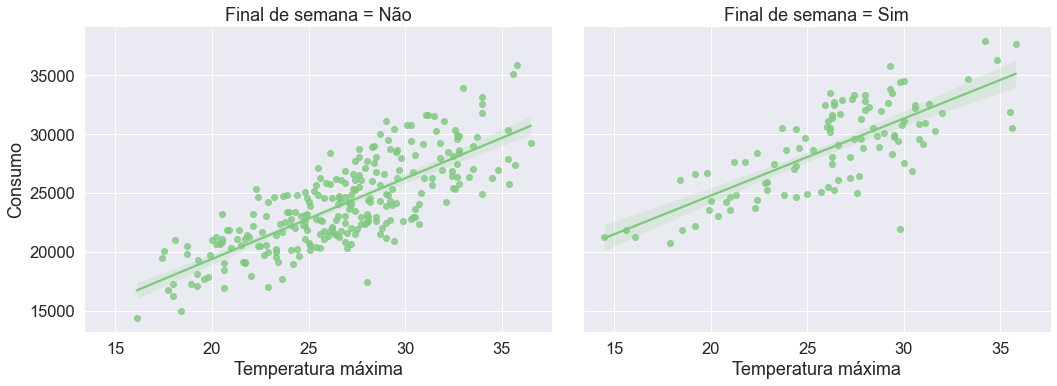

In [283]:
aux = dados.copy()
aux['Final de semana'] = aux['fds'].map({0:'Não', 1:'Sim'})

ax = sns.lmplot(data=aux, x='temp_max', y='consumo', col='Final de semana', line_kws={'color': '#395B50'})

ax.set_xlabels('Temperatura máxima')
ax.set_ylabels('Consumo')
ax.figure.set_size_inches(16, 6)
plt.show()

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [284]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [285]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [286]:
x = dados[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [287]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [289]:
model = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [290]:
model.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [291]:
print(f'R²: {model.score(x_train, y_train).round(3)}')

R²: 0.705


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [292]:
pred = model.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [293]:
print(f'R²: {metrics.r2_score(y_test, pred).round(3)}')

R²: 0.749


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [294]:
x_test.iloc[0:1]

,temp_max,chuva,fds
193,28.7,0.0,0


## Gerando previsão pontual

In [295]:
model.predict(x_test.iloc[0:1])[0]

25554.14149913581

## Criando um simulador simples

In [296]:
t_max = float(input('Temperatura máxima (°C): '))
chuva = float(input('Chuva (mm): '))
fds = int(input('Final de semana (sim=1, não=0): '))

print(f'\nPrevisão para {model.predict([[t_max, chuva, fds]])[0].round(2)} litros de consumo')

Temperatura máxima (°C): 27
Chuva (mm): 0
Final de semana (sim=1, não=0): 1

Previsão para 29754.32 litros de consumo


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [297]:
model.intercept_

6396.174228697255

In [298]:
type(model.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [299]:
model.coef_

array([ 667.524992  ,  -53.05718063, 5334.97184259])

In [300]:
type(model.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [301]:
x.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [302]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [303]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,6396.174229
Temperatura Máxima,667.524992
Chuva,-53.057181
Final de Semana,5334.971843


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>6396.17 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>667.52 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-53.06 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5334.97 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [304]:
pred_train = model.predict(x_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

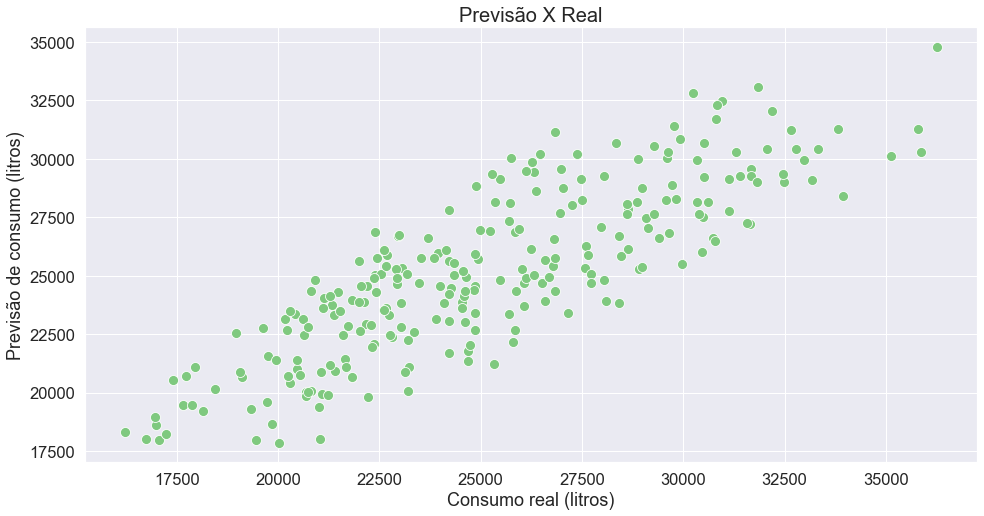

In [305]:
ax = sns.scatterplot(x=y_train, y=pred_train, s=100)

ax.figure.set_size_inches(16, 8)
ax.set_title('Previsão X Real', fontsize=20)
ax.set_ylabel('Previsão de consumo (litros)')
ax.set_xlabel('Consumo real (litros)')

plt.show()

## Obtendo os resíduos

In [306]:
residuo = y_train - pred_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

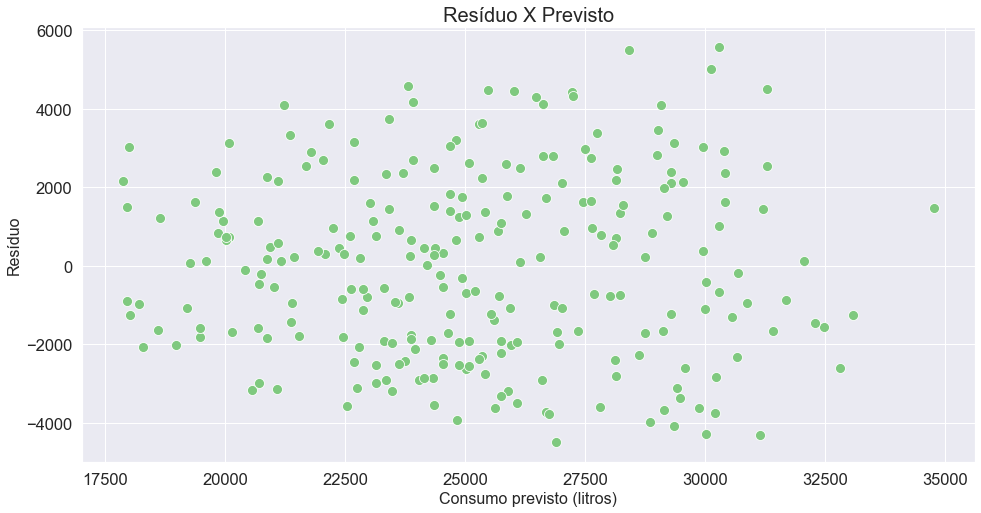

In [307]:
ax = sns.scatterplot(x=pred_train, y=residuo, s=100)

ax.figure.set_size_inches(16, 8)
ax.set_title('Resíduo X Previsto', fontsize=20)
ax.set_ylabel('Resíduo', fontsize=16)
ax.set_xlabel('Consumo previsto (litros)', fontsize=16)

plt.show()

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

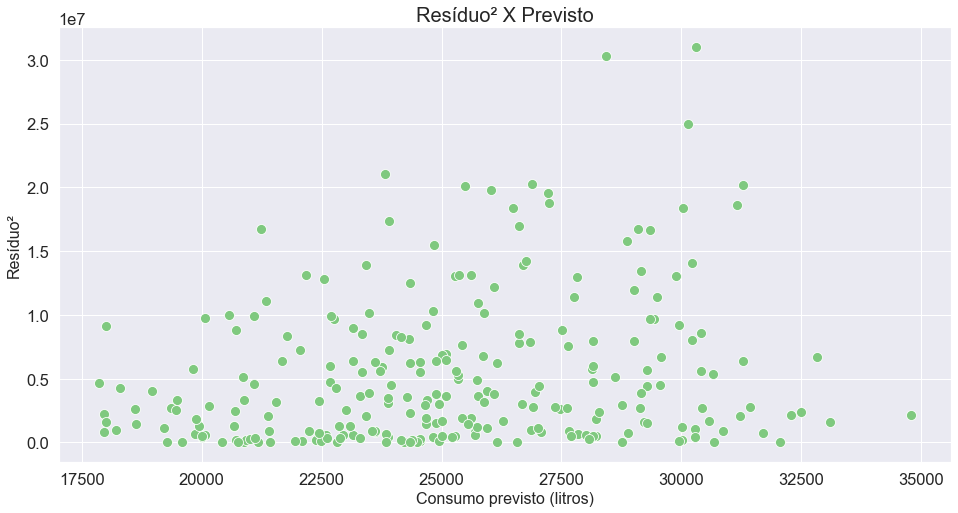

In [308]:
ax = sns.scatterplot(x=pred_train, y=residuo**2, s=100)

ax.figure.set_size_inches(16, 8)
ax.set_title('Resíduo² X Previsto', fontsize=20)
ax.set_ylabel('Resíduo²', fontsize=16)
ax.set_xlabel('Consumo previsto (litros)', fontsize=16)

plt.show()

## Plotando a distribuição de frequências dos resíduos

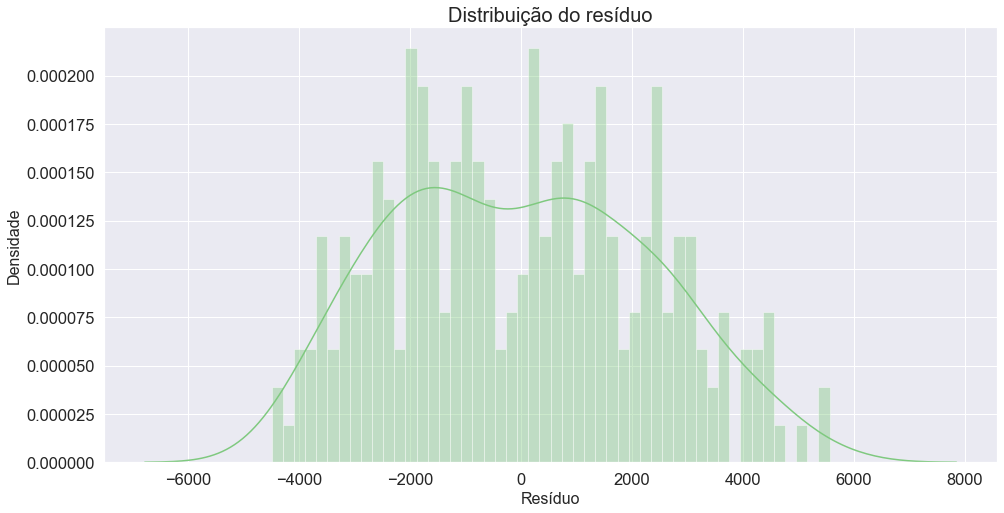

In [309]:
ax = sns.distplot(residuo, bins=50)

ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição do resíduo', fontsize=20)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_xlabel('Resíduo', fontsize=16)

plt.show()

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [310]:
x2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [311]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [312]:
model_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [313]:
model_2.fit(x2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [320]:
print(f'Modelo com Temperatura Média\nR²: {model_2.score(x2_train, y2_train).round(3)}')

Modelo com Temperatura Média
R²: 0.662


In [321]:
print(f'Modelo com Temperatura Máxima\nR²: {model.score(x_train, y_train).round(3)}')

Modelo com Temperatura Máxima
R²: 0.705


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [322]:
pred_2 = model_2.predict(x2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [323]:
print(f'Modelo com Temperatura Média\nR²: {metrics.r2_score(y2_test, pred_2).round(3)}')

Modelo com Temperatura Média
R²: 0.657


In [324]:
print(f'Modelo com Temperatura Média\nR²: {metrics.r2_score(y_test, pred).round(3)}')

Modelo com Temperatura Média
R²: 0.749


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [329]:
mse_2 = metrics.mean_squared_error(y2_test, pred_2)
r_mse_2 = np.sqrt(mse_2)
r2_2 = metrics.r2_score(y2_test, pred_2)

## Obtendo métricas para o modelo com Temperatura Máxima

In [330]:
mse = metrics.mean_squared_error(y_test, pred)
r_mse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, pred)

## Comparação

In [331]:
pd.DataFrame({
    'MSE': [mse.round(3), mse_2.round(3)],
    'ROOT MSE': [r_mse.round(3), r_mse_2.round(3)],
    'R2': [r2.round(3), r2_2.round(3)]
}, index=['Modelo 1', 'Modelo 2'])

,MSE,ROOT MSE,R2
Modelo 1,5480853.460,2341.122,0.749
Modelo 2,6060775.461,2461.864,0.657


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [332]:
import pickle

In [337]:
out = open('model_consumo_cerveja', 'wb')
pickle.dump(model, out)
out.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```